In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.interpolate as interpolate
from scipy.interpolate import lagrange

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
# cinco puntos
def five_point_derivative(f, x, h):
  return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

#arreglo
x=np.linspace(0,2*np.pi,10)

#funcion
f=np.cos

#evaluacion
f_eval=f(x)

df=five_point_derivative(f,x,0.05)
#print(df)

df_interpol=lagrange(x,df)
#print(df_interpol)

df_2=five_point_derivative(df_interpol,x,0.05)
#print(df_2)

df_2_interpol=lagrange(x,df_2)
#print(df_2_interpol)

print(df_2_interpol(np.pi/8))


-0.9240727505539883


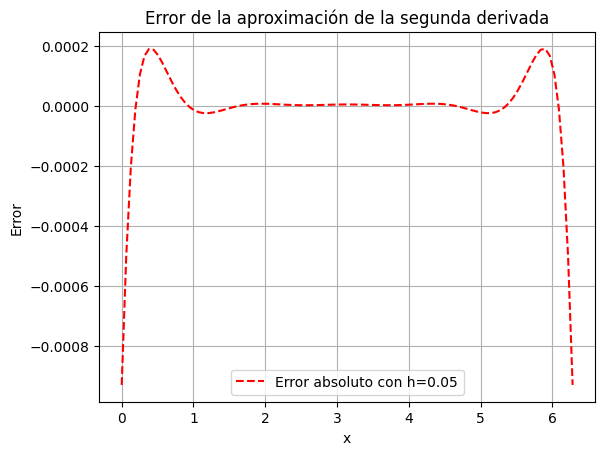

In [ ]:
x_valores=np.linspace(0,2*np.pi,100)

deriv_2_exacta=-np.cos(x_valores)

#error
error=deriv_2_exacta-df_2_interpol(x_valores)

plt.plot(x_valores, error, label='Error absoluto con h=0.05', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de la aproximación de la segunda derivada')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#comparacion del error con h mayor
f_eval=f(x)

df_mayor=five_point_derivative(f,x,1)
#print(df)

df_interpol_mayor=lagrange(x,df_mayor)
#print(df_interpol)

df_2_mayor=five_point_derivative(df_interpol_mayor,x,1)
#print(df_2)

df_2_interpol_mayor=lagrange(x,df_2_mayor)
#print(df_2_interpol)

error_mayor=deriv_2_exacta-df_2_interpol_mayor(x_valores)



In [ ]:
#comparacion del error con h menor
f_eval=f(x)

df_menor=five_point_derivative(f,x,0.00001)
#print(df)

df_interpol_menor=lagrange(x,df_menor)
#print(df_interpol)

df_2_menor=five_point_derivative(df_interpol_menor,x,0.00001)
#print(df_2)

df_2_interpol_menor=lagrange(x,df_2_menor)
#print(df_2_interpol)

error_menor=deriv_2_exacta-df_2_interpol_menor(x_valores)

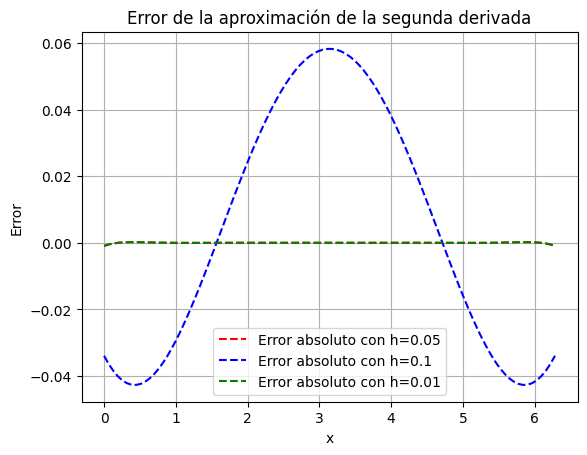

In [ ]:
plt.plot(x_valores, error, label='Error absoluto con h=0.05', color='red', linestyle='--')
plt.plot(x_valores, error_mayor, label='Error absoluto con h=0.1', color='blue', linestyle='--')
plt.plot(x_valores, error_menor, label='Error absoluto con h=0.01', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de la aproximación de la segunda derivada')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(np.mean(error_mayor))
print(np.mean(error_menor))
print(np.mean(error))

0.00304414821559501
-1.0122634748454851e-05
-1.0145717733919014e-05


Conclusion: disminuye el error con el h

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
import numpy as np
from scipy.misc import derivative

In [ ]:
f= lambda x:x*np.exp(x)
x=np.linspace(1.8,2.2,6)

In [ ]:
primera_derivada_sp=derivative(f,2,dx=1e-6) #scipy hace derivadas en un punto x0 con diferencias finitas
print(primera_derivada_sp)

22.167168297393403


<ipython-input-4-6913c84052d4>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  primera_derivada_sp=derivative(f,2,dx=1e-6) #scipy hace derivadas en un punto x0 con diferencias finitas


In [ ]:
segunda_derivada_sp=derivative(f,2,dx=1e-6,n=2)
print(segunda_derivada_sp)

29.560354164459568


<ipython-input-5-8a818237c947>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  segunda_derivada_sp=derivative(f,2,dx=1e-6,n=2)


In [ ]:
derivada=np.gradient(f(x),x)

derivada_2=np.gradient(derivada,x)

derivada_int=lagrange(x,derivada)

derivada_int=lagrange(x,derivada)

derivada_2_int=lagrange(x,derivada_2)

#evaluar
print(derivada_int(2))
print(derivada_2_int(2))


22.19959710049443
30.77327252854593


In [ ]:
h_valores=np.linspace(0.001,0.1,10)

In [ ]:
primera_derivada_error=np.zeros(len(h_valores))
segunda_derivada_error=np.zeros(len(h_valores))

<ipython-input-45-b639f390b143>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  primera_derivada_error = [derivative(f, 2, dx=h) for h in h_valores]
<ipython-input-45-b639f390b143>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  segunda_derivada_error = [derivative(f, 2, dx=h, n=2) for h in h_valores]


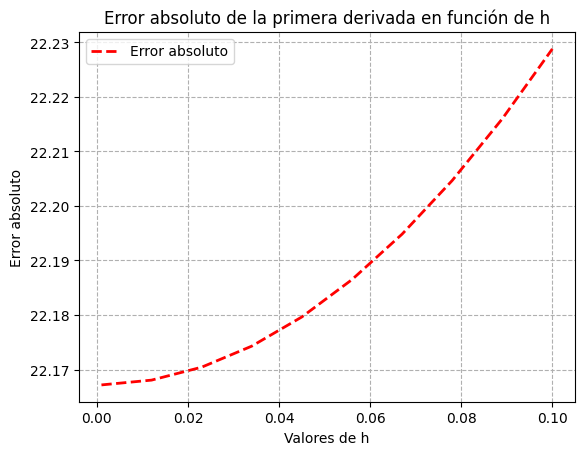

In [ ]:
for h in h_valores:
  primera_derivada_error = [derivative(f, 2, dx=h) for h in h_valores]
  #print(primera_derivada_error)

  segunda_derivada_error = [derivative(f, 2, dx=h, n=2) for h in h_valores]
  #print(segunda_derivada_error)

primera_derivada_error_int = lagrange(h_valores, primera_derivada_error)
segunda_derivada_error_int=lagrange(h_valores,segunda_derivada_error)

error_primera=np.abs(primera_derivada_error-derivada_int)
error_segunda=np.abs(segunda_derivada_error-derivada_2_int)


plt.plot(h_valores, primera_derivada_error_int(h_valores), label=f'Error absoluto', color='red', linestyle='--', linewidth=2)

plt.title('Error absoluto de la primera derivada en función de h')
plt.xlabel('Valores de h')
plt.ylabel('Error absoluto')

plt.grid(True, linestyle='--')

plt.legend( loc='best')
plt.show()

Conclusión: aumenta error con el h, el mejor es 0.001

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [ ]:
f = lambda x: x * np.exp(x)
x0 = 2.0

In [ ]:
def derivada_diferencias_finitas(f, x, h):
  return (f(x + h) - f(x)) / h

def derivada_tres_puntos(f, x, h):
  return (f(x + h) - f(x - h)) / (2 * h)

def derivada_cinco_puntos(f, x, h):
  return (-f(x + 2 * h) + 8 * f(x + h) - 8 * f(x - h) + f(x - 2 * h)) / (12 * h)

In [ ]:
h_optimo = 0.001  # Asumiendo que este es el valor de h con el menor error

derivada_df = derivada_diferencias_finitas(f, x0, h_optimo)
derivada_tp = derivada_tres_puntos(f, x0, h_optimo)
derivada_cp = derivada_cinco_puntos(f, x0, h_optimo)

In [ ]:
derivada_real = derivative(f, 2, dx=1e-6)

<ipython-input-52-ee1f553803ba>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada_real = derivative(f, 2, dx=1e-6)


In [ ]:
error_df = abs(derivada_df - derivada_real)
error_tp = abs(derivada_tp - derivada_real)
error_cp = abs(derivada_cp - derivada_real)

In [ ]:
print("Derivada por diferencias finitas:", derivada_df, "Error:", error_df)
print("Derivada por tres puntos:", derivada_tp, "Error:", error_tp)
print("Derivada por cinco puntos:", derivada_cp, "Error:", error_cp)

Derivada por diferencias finitas: 22.181952568383068 Error: 0.01478427098966506
Derivada por tres puntos: 22.16717445433769 Error: 6.156944287738497e-06
Derivada por cinco puntos: 22.167168296788702 Error: 6.047002898412757e-10
